<a href="https://colab.research.google.com/github/pduyn308/ANN/blob/Vietnamese-Banknotes-Recognition/Vietnamese_banknotes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("nguyentrongdai/vietnamese-currency")

print("Path to dataset files:", path)

100%|██████████| 238M/238M [00:03<00:00, 73.6MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/nguyentrongdai/vietnamese-currency/versions/1


In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

banknotes_classes = ['000000', '000200', '000500', '001000', '002000', '005000', '010000', '020000', '050000', '100000', '200000', '500000']
image_size = 64

data = []
labels = []

for i, banknotes in enumerate(banknotes_classes):
    folder = os.path.join(path, 'dataset', banknotes)
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        try:
            img = cv2.imread(img_path)
            img = cv2.resize(img, (image_size, image_size))
            img = img / 255.0
            data.append(img.flatten())
            labels.append(i)
        except:
            continue

data = np.array(data)
labels = to_categorical(labels, num_classes=len(banknotes_classes))

# Chia train/test
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(512, activation='relu', input_shape=(image_size * image_size * 3,)),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(len(banknotes_classes), activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history=model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 11s 122ms/step - accuracy: 0.1044 - loss: 4.7307 - val_accuracy: 0.1529 - val_loss: 2.3898
Epoch 2/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 7s 80ms/step - accuracy: 0.1549 - loss: 2.3796 - val_accuracy: 0.1786 - val_loss: 2.3337
Epoch 3/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 7s 99ms/step - accuracy: 0.1735 - loss: 2.3065 - val_accuracy: 0.1621 - val_loss: 2.2149
Epoch 4/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 10s 94ms/step - accuracy: 0.1701 - loss: 2.2379 - val_accuracy: 0.1621 - val_loss: 2.2060
Epoch 5/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 5s 79ms/step - accuracy: 0.1491 - loss: 2.2440 - val_accuracy: 0.2136 - val_loss: 2.1910
Epoch 6/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 11s 87ms/step - accuracy: 0.1772 - loss: 2.2199 - val_accuracy: 0.2044 - val_loss: 2.1757
Epoch 7/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 5s 79ms/step - accuracy: 0.1777 - loss: 2.2627 - val_accuracy: 0.1510 - val_loss: 2.3333
Epoch 8/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 10s 79ms/step - accuracy: 0.1266 - loss: 2.3407 - val_accuracy: 0.158

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


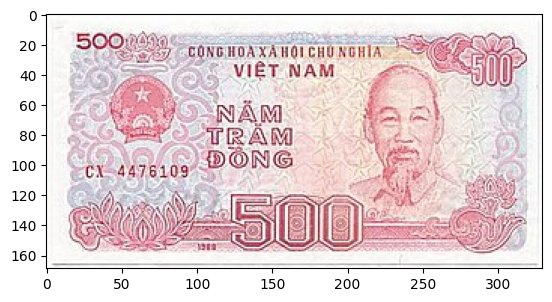

Predicted Vietnamese Banknotes: 000500


In [5]:
import cv2

def preprocess_image(image_path, image_size=64):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (image_size, image_size))
    img = img / 255.0
    img = img.flatten()
    return np.expand_dims(img, axis=0)

image_path = '/content/5000 dđồng.jpg'
processed_image = preprocess_image(image_path)
predictions = model.predict(processed_image)
predicted_class = np.argmax(predictions)


img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()
print(f"Predicted Vietnamese Banknotes: {banknotes_classes[predicted_class]}")